<a href="https://colab.research.google.com/github/apoorvapradip/Deep-Learning-Based-Disease-Detection./blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.image as mpimg

In [ ]:
import os
import shutil
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter
import math
from math import floor
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [ ]:
path = r'/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train'
classes = os.listdir(path)

In [ ]:
classes

['eczema', 'psoriasis', 'acne']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 10)

<Figure size 1000x1000 with 0 Axes>

In [ ]:
acne_dir =r'/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train/acne'
eczema_dir = r'/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train/eczema'
psoriasis_dir =r'/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train/psoriasis'

In [ ]:
acne_names = os.listdir(acne_dir)
eczema_names = os.listdir(eczema_dir)
psoriasis_names = os.listdir(psoriasis_dir)

In [ ]:
pic_index = 10

In [ ]:
acne_images = [os.path.join(acne_dir, fname) for fname in acne_names[pic_index-10:pic_index]]
pic_index = 10  # Safe default, change as needed

# Adjust to minimum length available in directories
max_psoriasis = min(len(psoriasis_names), pic_index)
max_eczema = min(len(eczema_names), pic_index)

# Load paths
psoriasis_images = [os.path.join(psoriasis_dir, fname) for fname in psoriasis_names[:max_psoriasis]]
eczema_images = [os.path.join(eczema_dir, fname) for fname in eczema_names[:max_eczema]]

In [ ]:
print(len(acne_names))

5


In [ ]:
print(len(eczema_images))

7


In [ ]:
print(len(psoriasis_images))

6


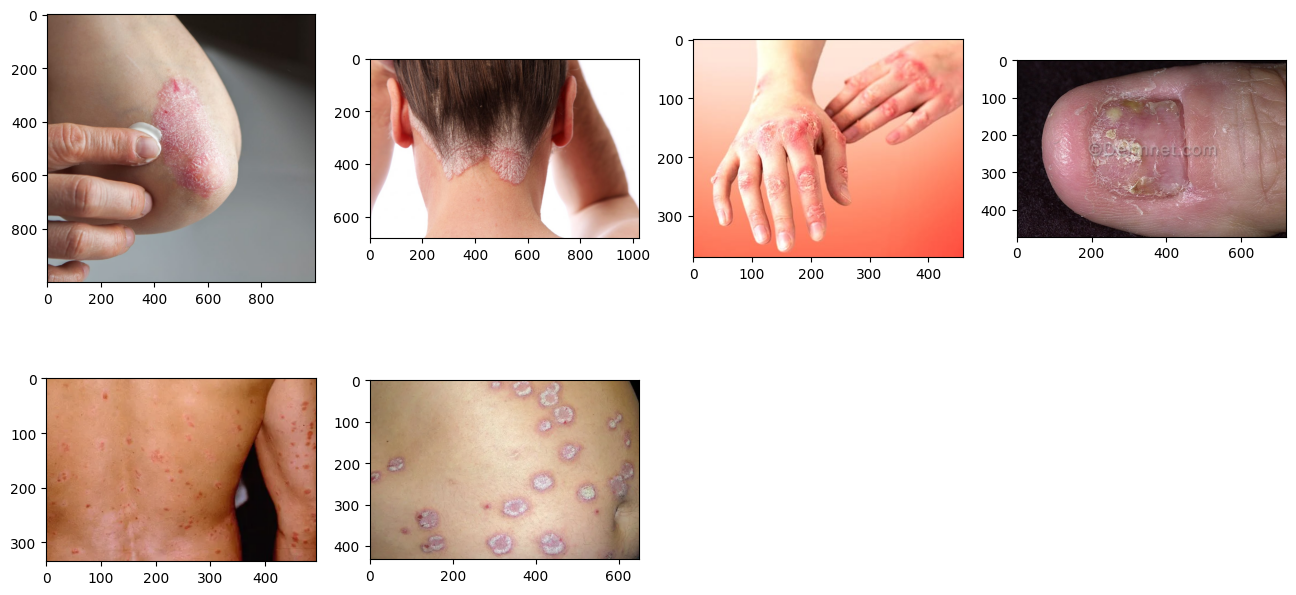

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_path in enumerate(psoriasis_images ):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

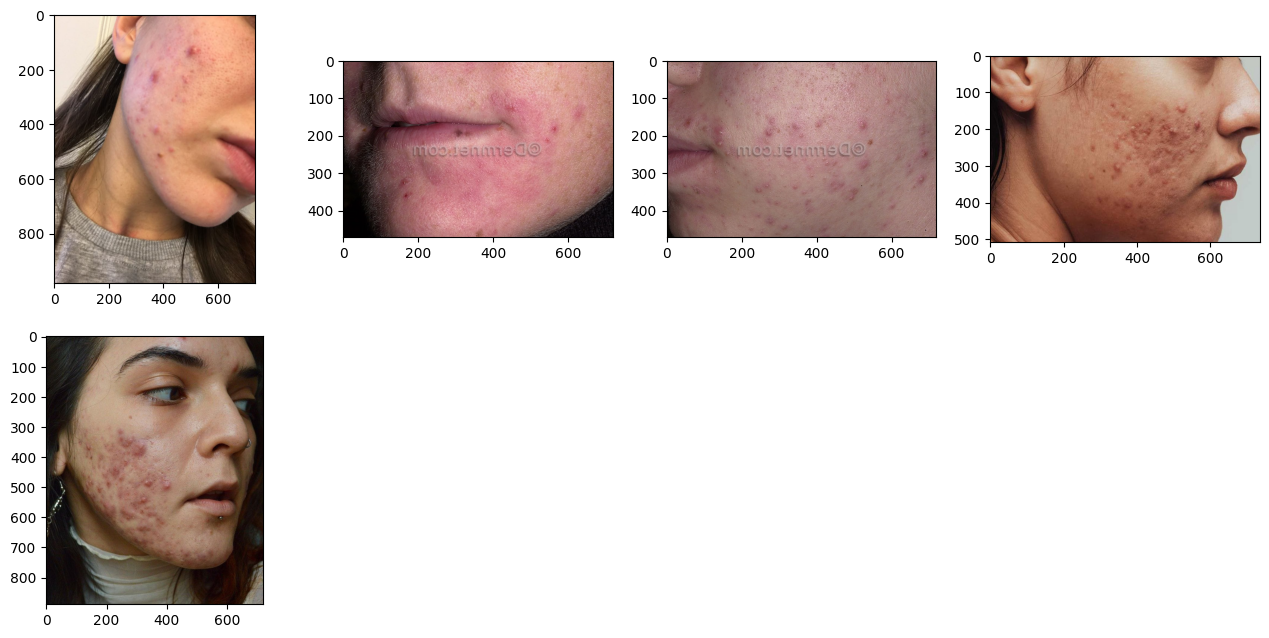

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_name in enumerate(acne_names):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')
  # Join the directory path with the image name to get the full path
  img_path = os.path.join(acne_dir, img_name)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

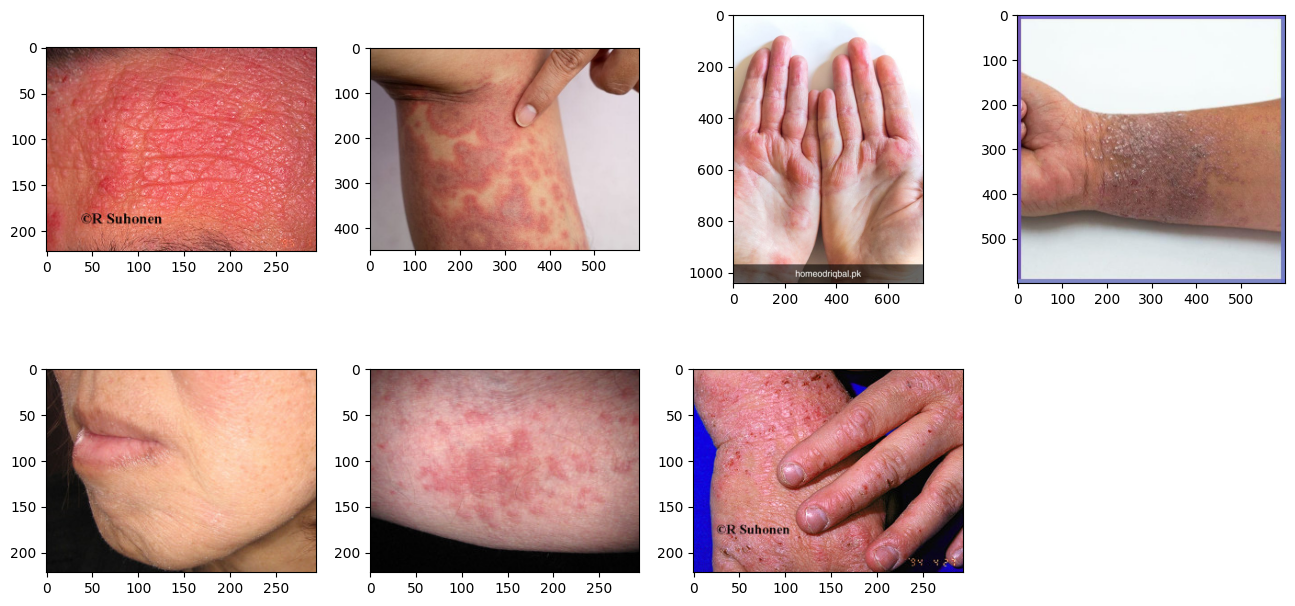

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_name in enumerate(eczema_images):
  sp = plt.subplot(4, 4, i+1)
  sp.axis('On')
  # Join the directory path with the image name to get the full path
  img_path = os.path.join(eczema_dir, img_name)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import os

base_dir = '/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train'
for root, dirs, files in os.walk(base_dir):
    for name in files:
        print(name)

eczema1.jpg
e1.jpg
e2.jpg
e3.jpg
eczema4.jpg
eczema3.jpg
eczema2.jpg
p1.jpg
p2.jpg
p3.jpg
psoriasis3.jpg
psoriasis2.jpg
psoriasis1.jpg
acne.jpg
acne1.jpg
acne2.jpg
a1.jpg
a3.jpg


In [ ]:
# Load the VGG16 model, excluding the top fully connected layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [ ]:

# Add Dropout and Build Model Again if Needed
base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout added
predictions = Dense(len(classes), activation='softmax')(x)


In [ ]:
# Create the full model
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,243 (80.64 MB)

 Trainable params: 6,423,555 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding = "same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(3, activation="softmax")) # Change the output layer to 3 neurons for 3 classes
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,547 (95.75 MB)

 Trainable params: 25,100,547 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding = "same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500, activation="relu"))
model.add(Dense(3, activation="softmax")) # Change the output layer to 3 neurons for 3 classes
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 112, 112, 32)   │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 56, 56, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 500)            │    25,088,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,100,547 (95.75 MB)

 Trainable params: 25,100,547 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# No validation_split here
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

validation_generator = valid_datagen.flow_from_directory(
    '/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)



Found 18 images belonging to 3 classes.
Found 16 images belonging to 3 classes.


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    verbose=1
)


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.0796 - val_accuracy: 0.5625 - val_loss: 0.9614
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step - accuracy: 0.3889 - loss: 1.1667 - val_accuracy: 0.1875 - val_loss: 1.0715
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.3333 - loss: 1.0084 - val_accuracy: 0.1875 - val_loss: 1.1396
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5556 - loss: 1.0249 - val_accuracy: 0.6875 - val_loss: 1.0085
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.7778 - loss: 0.9383 - val_accuracy: 0.5625 - val_loss: 0.8820
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.6111 - loss: 0.8714 - val_accuracy: 0.5625 - val_loss: 0.8484
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5000 - loss: 0.8574 - val_accuracy: 0.5625 - val_loss: 0.8454
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - accuracy: 0.5000 - loss: 0.8186 - val_accuracy: 0.7500 - val_loss: 0.

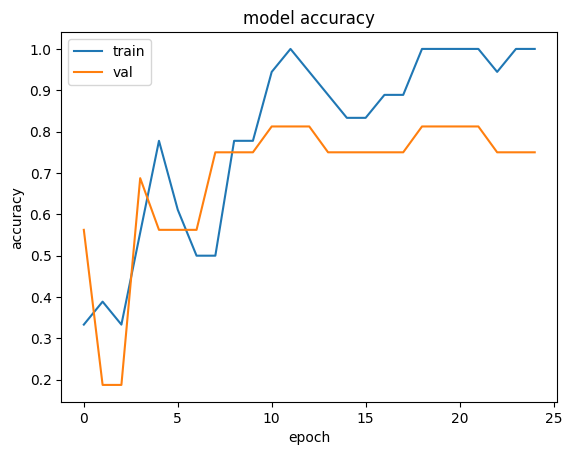

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


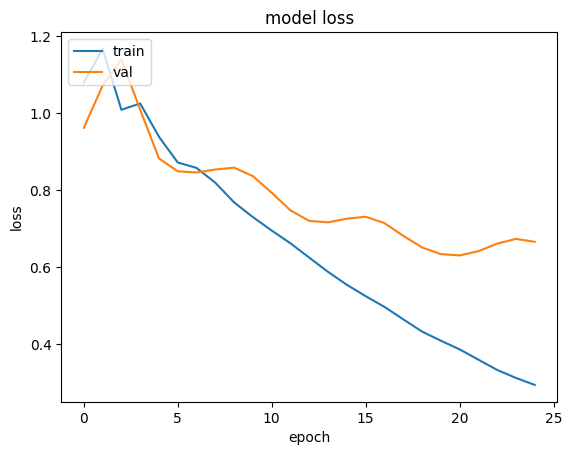

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [ ]:
results = model.evaluate(validation_generator, verbose=0)
##print("Test Loss: {:.4f}".format(results[0]))

print("Test Accuracy: {:.2f}%".format(results[1]*100))


Test Accuracy: 75.00%


In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


In [ ]:
img_path=r"/content/drive/MyDrive/Project/Projects/Dermatology_Dataset/train/eczema/eczema3.jpg"

In [ ]:
img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))


In [ ]:
x=np.expand_dims(img,axis=0)
x=preprocess_input(x)
result=model.predict(x)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


[[  0 100   0]]


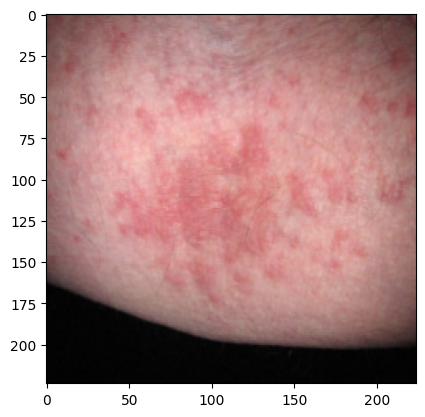

In [ ]:

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

print((result*100).astype('int'))

plt.imshow(img)



In [ ]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)


[np.int64(0), np.int64(100), np.int64(0)]


In [ ]:
print("Largest element is:",max(pp))

Largest element is: 100


In [ ]:
index=pp.index(max(pp))

In [ ]:
name_class=['acne', 'eczema', 'psoriasis']
name_class[index]


'eczema'

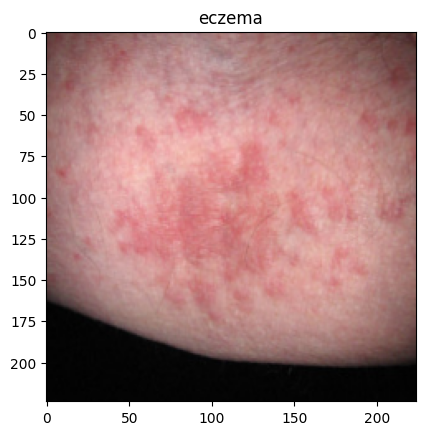

In [ ]:
plt.title(name_class[index])
plt.imshow(img)
